In [4]:
# import library
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [1]:
import plotly
plotly.tools.set_credentials_file(username='jjone', api_key='')

import plotly.plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot 

# jupyter setting
init_notebook_mode(connected = True)


AttributeError: module 'plotly.tools' has no attribute 'set_credentials_file'

In [6]:
# Import the dataset
online = pd.read_excel('Online_Retail.xlsx')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# drop the row missing customerID
online = online[online.CustomerID.notnull()]

In [8]:
# I'll use only the subset of the full dataset, taking 30% of samples.
# use a subset of full data
np.random.seed(306)
online = online.sample(frac = .3).reset_index(drop = True)
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,542401,22502,PICNIC BASKET WICKER SMALL,2,2011-01-27 15:51:00,5.95,14541.0,United Kingdom
1,542231,22726,ALARM CLOCK BAKELIKE GREEN,2,2011-01-26 13:40:00,3.75,16714.0,United Kingdom
2,556956,22090,PAPER BUNTING RETROSPOT,40,2011-06-16 09:04:00,2.55,13694.0,United Kingdom
3,573874,23581,JUMBO BAG PAISLEY PARK,10,2011-11-01 12:45:00,2.08,13868.0,United Kingdom
4,580742,23343,JUMBO BAG VINTAGE CHRISTMAS,200,2011-12-06 09:30:00,1.75,13694.0,United Kingdom


In [9]:
# extract year, month and day 
online['InvoiceDay'] = online.InvoiceDate.apply(lambda x: dt.datetime(x.year, x.month, x.day))
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,542401,22502,PICNIC BASKET WICKER SMALL,2,2011-01-27 15:51:00,5.95,14541.0,United Kingdom,2011-01-27
1,542231,22726,ALARM CLOCK BAKELIKE GREEN,2,2011-01-26 13:40:00,3.75,16714.0,United Kingdom,2011-01-26
2,556956,22090,PAPER BUNTING RETROSPOT,40,2011-06-16 09:04:00,2.55,13694.0,United Kingdom,2011-06-16
3,573874,23581,JUMBO BAG PAISLEY PARK,10,2011-11-01 12:45:00,2.08,13868.0,United Kingdom,2011-11-01
4,580742,23343,JUMBO BAG VINTAGE CHRISTMAS,200,2011-12-06 09:30:00,1.75,13694.0,United Kingdom,2011-12-06


In [10]:
# the number of customers
online.CustomerID.nunique()

4222

In [11]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,542401,22502,PICNIC BASKET WICKER SMALL,2,2011-01-27 15:51:00,5.95,14541.0,United Kingdom,2011-01-27
1,542231,22726,ALARM CLOCK BAKELIKE GREEN,2,2011-01-26 13:40:00,3.75,16714.0,United Kingdom,2011-01-26
2,556956,22090,PAPER BUNTING RETROSPOT,40,2011-06-16 09:04:00,2.55,13694.0,United Kingdom,2011-06-16
3,573874,23581,JUMBO BAG PAISLEY PARK,10,2011-11-01 12:45:00,2.08,13868.0,United Kingdom,2011-11-01
4,580742,23343,JUMBO BAG VINTAGE CHRISTMAS,200,2011-12-06 09:30:00,1.75,13694.0,United Kingdom,2011-12-06


In [12]:
print('Min : {}, Max : {}'.format(min(online.InvoiceDay), max(online.InvoiceDay)))

Min : 2010-12-01 00:00:00, Max : 2011-12-09 00:00:00


In [13]:
# The last day of purchase in total is 09 DEC, 2011. To calculate the day periods, let's set 
# one day after the last one, or 10 DEC as a pin date. We will cound the diff days with pin_date.
pin_date = max(online.InvoiceDay) + dt.timedelta(1)

In [14]:
# Create total spend dataframe
online['TotalSum'] = online.Quantity * online.UnitPrice

online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,TotalSum
0,542401,22502,PICNIC BASKET WICKER SMALL,2,2011-01-27 15:51:00,5.95,14541.0,United Kingdom,2011-01-27,11.9
1,542231,22726,ALARM CLOCK BAKELIKE GREEN,2,2011-01-26 13:40:00,3.75,16714.0,United Kingdom,2011-01-26,7.5
2,556956,22090,PAPER BUNTING RETROSPOT,40,2011-06-16 09:04:00,2.55,13694.0,United Kingdom,2011-06-16,102.0
3,573874,23581,JUMBO BAG PAISLEY PARK,10,2011-11-01 12:45:00,2.08,13868.0,United Kingdom,2011-11-01,20.8
4,580742,23343,JUMBO BAG VINTAGE CHRISTMAS,200,2011-12-06 09:30:00,1.75,13694.0,United Kingdom,2011-12-06,350.0


In [15]:
# calculate RFM values
rfm = online.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (pin_date - x.max()).days,
    'InvoiceNo' : 'count', 
    'TotalSum' : 'sum'})

In [16]:
# rename the columns
rfm.rename(columns = {'InvoiceDate' : 'Recency', 
                      'InvoiceNo' : 'Frequency', 
                      'TotalSum' : 'Monetary'}, inplace = True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,45,980.10
12348.0,248,9,728.88
12349.0,18,25,486.87
12350.0,310,3,45.70
12352.0,36,32,1353.48


In [17]:
# RFM quartiles
# create labels and assign them to tree percentile groups 
r_labels = range(4, 0, -1)
r_groups = pd.qcut(rfm.Recency, q = 4, labels = r_labels)

f_labels = range(1, 5)
f_groups = pd.qcut(rfm.Frequency, q = 4, labels = f_labels)

m_labels = range(1, 5)
m_groups = pd.qcut(rfm.Monetary, q = 4, labels = m_labels)

m_groups.head()

CustomerID
12347.0    4
12348.0    4
12349.0    3
12350.0    1
12352.0    4
Name: Monetary, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [18]:
# make a new column for group labels
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

In [19]:
# sum up the three columns
rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347.0,2,45,980.10,4,4,4,444,12.0
12348.0,248,9,728.88,1,2,4,124,7.0
12349.0,18,25,486.87,3,3,3,333,9.0
12350.0,310,3,45.70,1,1,1,111,3.0
12352.0,36,32,1353.48,3,3,4,334,10.0


In [20]:
# calculate averae values for each RFM_score
rfm_agg = rfm.groupby('RFM_Score').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']})
rfm_agg.round(1).head()

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3.0         258.3       2.9    -57.5   409
4.0         172.1       4.5     60.0   372
5.0         143.5       6.5    106.5   495
6.0         104.0       9.3    191.8   471
7.0          81.3      13.0    237.5   418

In [21]:
# assign labels from total score
score_labels = ['Green', 'Bronze', 'Silver', 'Gold']
score_groups = pd.qcut(rfm.RFM_Score, q = 4, labels = score_labels)
rfm['RFM_Level'] = score_groups.values

rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12347.0,2,45,980.10,4,4,4,444,12.0,Gold
12348.0,248,9,728.88,1,2,4,124,7.0,Bronze
12349.0,18,25,486.87,3,3,3,333,9.0,Silver
12350.0,310,3,45.70,1,1,1,111,3.0,Green
12352.0,36,32,1353.48,3,3,4,334,10.0,Silver


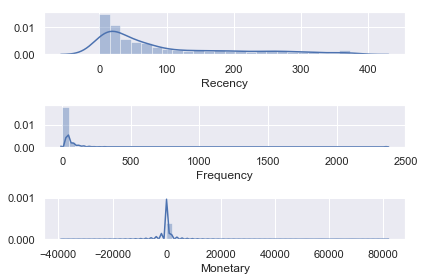

In [22]:
# Customer Segmentation with Kmeans
# We can also apply Kmeans clustering with RFM values. As Kmeans clustering require data to be 
# normalized and has a symmetric distribution, preprocessing process in scale is needed.


# Preprocessing
# plot the distribution of RFM values
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.Monetary, label = 'Monetary')

plt.tight_layout()
plt.show()

In [23]:
# As you can see above, the values are skewed and need to be normalized. Due to the zero or 
# negative values in Recency and MonetaryValue, we need to set them 1 before log transformation 
# and scaling.

# define function for the values below 0
def neg_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x

In [24]:
# apply the function to Recency and MonetaryValue column 
rfm['Recency'] = [neg_to_zero(x) for x in rfm.Recency]
rfm['Monetary'] = [neg_to_zero(x) for x in rfm.Monetary]
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12347.0,2,45,980.10,4,4,4,444,12.0,Gold
12348.0,248,9,728.88,1,2,4,124,7.0,Bronze
12349.0,18,25,486.87,3,3,3,333,9.0,Silver
12350.0,310,3,45.70,1,1,1,111,3.0,Green
12352.0,36,32,1353.48,3,3,4,334,10.0,Silver


In [25]:
# unskew the data
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
rfm_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,0.693,3.807,6.888
12348.0,5.513,2.197,6.592
12349.0,2.890,3.219,6.188
12350.0,5.737,1.099,3.822
12352.0,3.584,3.466,7.210


In [26]:
rfm_log.describe()

,Recency,Frequency,Monetary
count,4222.000000,4222.000000,4222.000000
mean,3.738968,2.566761,5.303256
std,1.486877,1.258514,1.428801
min,0.000000,0.000000,0.000000
25%,2.833000,1.792000,4.454500
50%,3.922000,2.565000,5.328500
75%,4.990000,3.466000,6.209750
max,5.922000,7.769000,11.313000


In [27]:
# scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

In [28]:
# transform into a dataframe
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)
rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,-2.048810,0.985595,1.109274
12348.0,1.193267,-0.293843,0.902083
12349.0,-0.571042,0.518322,0.619295
12350.0,1.343937,-1.166403,-1.036835
12352.0,-0.104236,0.714609,1.334664


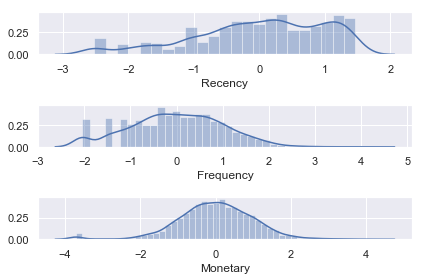

In [29]:
# plot the distribution of RFM values
plt.subplot(3, 1, 1); sns.distplot(rfm_scaled.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_scaled.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_scaled.Monetary, label = 'Monetary')

plt.tight_layout()
plt.show()

In [30]:
# K-means clustering
# With the Elbow method, we can get the optimal number of clusters

# initiate an empty dictionary
wcss = {}

# Elbow method with for loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300)
    kmeans.fit(rfm_scaled)
    wcss[i] = kmeans.inertia_

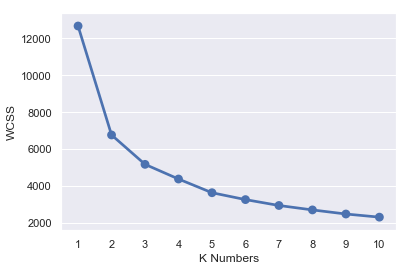

In [31]:
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

In [32]:
# choose n_clusters = 3
clus = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
# Assign the clusters to datamart
rfm['K_Cluster'] = clus.labels_
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12347.0,2,45,980.10,4,4,4,444,12.0,Gold,1
12348.0,248,9,728.88,1,2,4,124,7.0,Bronze,0
12349.0,18,25,486.87,3,3,3,333,9.0,Silver,0
12350.0,310,3,45.70,1,1,1,111,3.0,Green,2
12352.0,36,32,1353.48,3,3,4,334,10.0,Silver,1


In [34]:
# assign cluster column 
rfm_scaled['K_Cluster'] = clus.labels_
rfm_scaled['RFM_Level'] = rfm.RFM_Level
rfm_scaled.reset_index(inplace = True)

In [35]:
rfm_scaled.head()

,CustomerID,Recency,Frequency,Monetary,K_Cluster,RFM_Level
0,12347.0,-2.048810,0.985595,1.109274,1,Gold
1,12348.0,1.193267,-0.293843,0.902083,0,Bronze
2,12349.0,-0.571042,0.518322,0.619295,0,Silver
3,12350.0,1.343937,-1.166403,-1.036835,2,Green
4,12352.0,-0.104236,0.714609,1.334664,1,Silver


In [36]:
# melt the dataframe
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['CustomerID', 'RFM_Level', 'K_Cluster'], 
                     var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

,CustomerID,RFM_Level,K_Cluster,Metrics,Value
0,12347.0,Gold,1,Recency,-2.048810
1,12348.0,Bronze,0,Recency,1.193267
2,12349.0,Silver,0,Recency,-0.571042
3,12350.0,Green,2,Recency,1.343937
4,12352.0,Silver,1,Recency,-0.104236


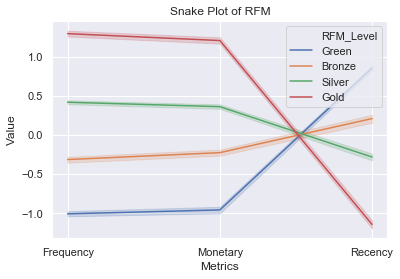

In [37]:
# a snake plot with RFM
import seaborn as sns
sns.set()
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

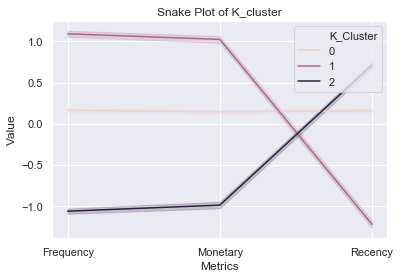

In [38]:
# a snake plot with K-Means
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melted)
plt.title('Snake Plot of K_cluster')
plt.legend(loc = 'upper right')

In [39]:
# the mean value for each cluster
cluster_avg = rfm.groupby('RFM_Level').mean().iloc[:, 0:3]
cluster_avg.head()

,Recency,Frequency,Monetary
RFM_Level,,,
Green,188.634796,4.769592,75.367774
Bronze,93.299213,11.023622,213.655636
Silver,47.362400,26.293600,446.474632
Gold,12.836431,90.825279,2045.677658


In [40]:
# the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
total_avg

Recency       93.131928
Frequency     28.907864
Monetary     590.967385
dtype: float64

In [41]:
# the proportional mean value
prop_rfm = cluster_avg/total_avg - 1
prop_rfm

,Recency,Frequency,Monetary
RFM_Level,,,
Green,1.025458,-0.835007,-0.872467
Bronze,0.001796,-0.618664,-0.638465
Silver,-0.491448,-0.090434,-0.244502
Gold,-0.862169,2.141888,2.461575


[]

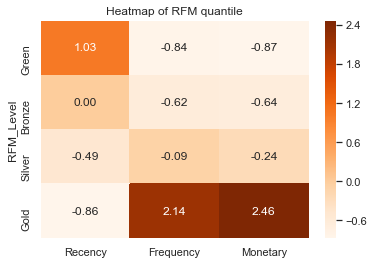

In [42]:
# heatmap
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()

In [43]:
# the mean value for each cluster
cluster_avg_K = rfm.groupby('K_Cluster').mean().iloc[:, 0:3]

# the proportional mean value
prop_rfm_K = cluster_avg_K/total_avg - 1
prop_rfm_K

,Recency,Frequency,Monetary
K_Cluster,,,
0,-0.128173,-0.311997,-0.432284
1,-0.872129,1.662328,1.910447
2,0.842828,-0.846309,-0.871895


[]

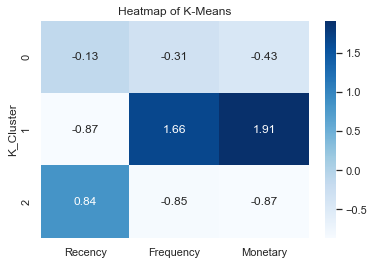

In [44]:
# heatmap
sns.heatmap(prop_rfm_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()

In [45]:
sub = []
myColors = ['#db437b', '#d3d64d', '#568ce2', '#b467bc']
for i in range(3):
    df = rfm_scaled[rfm_scaled.K_Cluster == i]
    x = df.Recency
    y = df.Frequency
    z = df.Monetary
    color = myColors[i]
    
    trace = go.Scatter3d(x = x, y = y, z = z, name = str(i),
                         mode = 'markers', marker = dict(size = 5, color = color, opacity = .7))
    sub.append(trace)

NameError: name 'go' is not defined